## 1.1

<table style="text-align:left">
  <tr>
    <th>Task<br></th>
    <th>A</th>
    <th>B</th>
    <th>C</th>
  </tr>
  <tr>
    <td>Genre classification</td>
    <td>Flat<br></td>
    <td>Multiple</td>
    <td>Presence of Word sets from each genre</td>
  </tr>
  <tr>
    <td>Author gender identification<br></td>
    <td>Flat</td>
    <td>Single</td>
    <td><br>Statistical: number of charachters per word, # short words, # different words<br><br>https://www.researchgate.net/publication/294830763_Gender_Classification_of_Web_Authors_Using_Feature_Selection_and_Language_Models</td>
  </tr>
  <tr>
    <td>Language identification</td>
    <td>Flat</td>
    <td>Single</td>
    <td>avg. sentence length, avg word length, vocabulary size, # uppercase letters (if any), character set</td>
  </tr>
  <tr>
    <td>Sentiment detection</td>
    <td>Flat</td>
    <td>Single</td>
    <td>Presence of words that indicate the sentiment, # uppercase letters (all caps = angry), review length</td>
  </tr>
  <tr>
    <td>Categorization of Wikipedia articles</td>
    <td>Hierarchical</td>
    <td>Multiple</td>
    <td><br>presence of word sets in article topics, number of digits, avg. word length</td>
  </tr>
  <tr>
    <td>Translationese identification</td>
    <td>Flat</td>
    <td>Single</td>
    <td>ngram perplexity</td>
  </tr>
</table>

# 1.2

In [1]:
import pandas as pd
import re
import numpy as np
from collections import Counter
from itertools import takewhile

def tokenize(text):
    "List all the word tokens (consecutive letters) in a text. Normalize to lowercase."
    return re.findall("[a-z]+", text.replace("'", '').lower())

In [2]:

file_path = 'ag_news_csv/'
train_name = file_path + 'train.csv'
test_name = file_path + 'test.csv'

train = pd.read_csv(train_name, header=None)
# train = train.iloc[0:100]
train.columns = ['class', 'title', 'doc']
train.doc = train.doc.apply(lambda x: tokenize(x))


## 1.2 (a,b, c)

In [16]:
tokenized_docs = [item for sublist in train.doc.tolist() for item in sublist]
total_words = len(tokenized_docs)
words = Counter(tokenized_docs)
words = dict(takewhile(lambda i: i[1] > 3, words.most_common()))

classes = train['class'].unique()
documents = pd.DataFrame(train.doc.tolist())

p_cs = {}
class_docs = {}
for c in classes:
    docs = train[train['class'] == c]
    class_docs[c] = docs
    p_cs[c] = len(docs) / len(train)


In [4]:
# asa
# make inverted index with classes
# makes one pass through the entire corpus and stores it in a dict
#{"word1": {"class":[doc_ids],"class": [doc_ids]},"word2":{"class":[doc_ids],"class": [doc_ids]}}
docs_at_term = {}
for row in train.iterrows():
    row_class = row[1]['class']
    doc_index = row[0]
    for term in row[1]['doc']:
        if term not in docs_at_term:
            docs_at_term[term] = {}
        if row_class not in docs_at_term[term]:
            docs_at_term[term][row_class] = []
        if doc_index not in docs_at_term[term][row_class]:
            docs_at_term[term][row_class].append(doc_index)
        

In [17]:
def pmi_expected(data, term):
    pmi_sum = 0
    for c in classes:
        class_pmi = pmi(data, term, c)
        p_c = p_cs[c]
        pmi_sum += p_c * class_pmi
    return pmi_sum

def pmi_max(data, term):
    pmis = []
    for c in classes:
        pmis.append(pmi(data, term, c))
    return max(pmis)

# here we are using the joint probability formula
# p(t,c) = joint = all docs having term t and of class c / total # of docs
# p(t) = count of term t in the corpus / total number of words in the corpus
# p(c) = count of docs of class c / total # of docs

# pmi = p(t,c) / (p(t)*p(c))
# alternatively, we defined p(t) = # of docs containing term t / total docs (calculated by the commented code)
def pmi(data, term, c):
    class_documents = class_docs[c]
    joint = len(docs_at_term[term][c] if c in docs_at_term[term] else []) / len(data)   
#     p_t = sum([len(docs_at_term[term][c] if c in docs_at_term[term] else []) for c in classes]) / len(data)
    p_t = words[term]/total_words
    p_c = len(class_documents) / len(data)
    return np.log2(joint / (p_t * p_c))


## 1.2 (d)

In [18]:
rankings = pd.DataFrame(columns = ['word', 'pmi_expected', 'pmi_max'])
rankings.word = words.keys()
print(range(len(words.keys())))
for i in range(len(words.keys())):
    rankings.iloc[i]['pmi_expected'] = pmi_expected(train, rankings.iloc[i]['word'])
    rankings.iloc[i]['pmi_max'] = pmi_max(train, rankings.iloc[i]['word'])
    


range(0, 27023)
the
a
to
of
in
and
on
for
s
that
with
as
its
at
said
is
by
it
has
new
an
from
reuters
his
will
was
after
have
be
their
two
us
are
over
quot
year
first
ap
he
but
gt
lt
this
more
monday
wednesday
one
tuesday
up
thursday
company
inc
friday
world
u
than
last
they
york
yesterday
against
about
who
not
were
into
out
three
been
president
had
million
corp
oil
when
week
time
would
united
sunday
which
years
game
people
today
government
could
no
second
n
group
com
percent
saturday
software
next
all
third
season
night
or
prices
iraq
security
day
fullquote
quarter
off
stocks
microsoft
minister
internet
announced
team
some
four
back
state
international
high
billion
washington
may
most
market
news
states
former
officials
top
can
business
says
other
win
if
month
victory
city
record
end
before
t
european
open
largest
technology
co
just
service
reported
american
league
sales
afp
computer
home
down
federal
you
five
killed
national
according
prime
what
expected
made
plans
research
while
maj

C:\Users\asanwari\AppData\Local\conda\conda\envs\nnia\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2



around
amp
foreign
fell
also
street
firm
russian
number
should
near
loss
any
forces
leading
right
used
reports
past
use
following
do
troops
buy
sox
quote
work
key
attack
pay
drug
economy
chicago
release
agency
led
share
car
both
per
profile
e
version
october
power
press
september
late
commission
gaza
beat
video
st
media
killing
your
price
player
best
well
rival
put
several
apple
products
uk
america
again
wall
capital
here
tokyo
workers
source
contract
offer
close
b
agreement
worlds
region
such
australian
recent
leaders
french
support
might
making
program
customers
conference
demand
scientists
whether
title
crude
digital
attacks
scored
un
jobs
champion
consumer
manager
lower
department
party
michael
nation
eight
house
she
saying
northern
energy
japanese
life
europe
center
line
los
november
southern
running
told
champions
low
little
political
without
meeting
management
peace
field
due
campaign
angeles
hurricane
decision
away
place
taking
launched
central
russia
good
canadian
winning
ora

offense
crucial
kevin
finding
boosted
involved
conditions
land
flu
entered
pre
strength
person
wake
changed
associates
poll
certain
edition
emergency
begun
speculation
prince
mutual
handheld
reportedly
putting
summit
info
dozens
rangers
islamabad
receiver
egypt
hurricanes
democracy
tie
regular
threats
antitrust
bombs
retirement
notre
surged
pack
candidates
view
movies
karzai
allegedly
believed
coalition
goods
blood
natural
convention
believes
arm
format
crash
promised
standards
activity
finish
mets
carlos
immediately
developer
soldier
model
treatment
planet
always
score
exports
faster
turning
age
rather
tampa
hills
pension
currency
priority
deadline
scoring
murder
ways
improved
enrichment
terrorists
cubs
admitted
pair
charles
activities
tests
cincinnati
agencies
owned
draft
sir
resigned
craig
vioxx
property
vehicle
ebay
continuing
greek
declined
bodies
ag
joe
gets
shut
warming
heat
nationwide
discuss
championships
ivory
dame
anticipated
via
flights
angels
enron
merck
date
lawyers
newsf

tested
czech
rovers
stern
stood
fully
editor
harmony
ally
pretty
aim
restore
loans
resort
celtic
retire
revised
pfizer
exporters
places
genesis
waters
dc
goog
horse
remove
hugo
venezuela
thrown
symantec
blackberry
ricky
computerworld
commitment
agassi
formal
representing
handset
newratings
deadliest
rolling
expert
forcing
licensing
ends
busch
chavez
rays
fenway
marking
tentative
els
lebanon
kicked
touch
rocked
switch
conspiracy
australias
text
conducted
ailing
enforcement
meant
write
seeks
pentagon
resistance
q
switzerland
regarding
affairs
rushing
funding
remember
thinking
opinion
malicious
diplomatic
protests
wmt
angry
severe
asking
suspend
detained
ticket
chile
replacement
congressional
forbes
priced
seriously
contest
native
material
adam
exhibition
ramallah
maintain
surprising
outfielder
recovered
beaten
melbourne
apart
present
factories
winners
wildlife
equatorial
voip
reds
village
nick
overhaul
spirit
jays
randy
survived
replaced
ballot
chemical
chirac
determined
challenger
vikin

robinson
vince
mistakes
regulations
tracks
guidance
extreme
disappointment
blasted
abc
trojan
venezuelan
accusations
visited
multimedia
omar
leagues
dialogue
colleagues
detailed
boycott
metres
raw
valued
aviv
demonstrated
kyle
infected
retreat
finale
button
islamist
drinks
chrysler
syracuse
flooding
column
predict
thinks
ayad
dust
theory
escape
delegates
unrest
counted
opposed
component
protecting
communication
metal
shutout
scheme
architecture
louisville
polish
gamers
gross
pursuit
cartel
defeating
handling
indicted
ba
shortstop
ibrahim
marat
kids
yesterdays
inspired
mails
cargo
stages
animal
drink
connect
offshore
combination
aides
malaysian
staged
distributor
containing
shoot
keith
pressed
campus
connected
maine
tore
attempted
beer
treated
bull
guns
volkswagen
dal
rockies
hampshire
videotape
establish
comcast
individuals
penn
strongly
legislative
example
mistake
presidency
narrow
caution
profitable
programming
neither
arlington
bertrand
identify
twenty
businessman
peoples
reduction


pete
outfit
recruits
rogers
checkpoint
brazils
derby
drugmaker
canaveral
postal
eleven
joseph
crop
barbados
gazprom
mcnair
dreamworks
dunhill
indicating
rocky
midst
sweet
dog
sample
declaration
filling
beneath
duke
convinced
featured
hidden
specification
eserver
nashville
confusion
attended
yao
cruised
tactics
wouldnt
fischer
smashed
hpq
invited
mood
romanian
underlying
billiton
strapped
sounds
mouse
ind
jazz
touched
requirements
lashed
cheese
scandals
giambi
snapped
tale
screensaver
thwart
santana
disclose
germanys
marketplace
simon
attached
josh
thoughts
architect
brent
conn
apply
disrupt
definitive
winless
maintenance
hub
mgm
bundesliga
elderly
imf
concrete
downloaded
automatically
earths
upgrades
cooling
achieved
verdict
truth
gotten
inspector
patient
temple
reversing
unleashed
clinching
lots
intervention
rooms
lists
lance
blown
stone
kicks
suse
smallest
reversed
fishing
stole
settling
woes
brink
lumber
contested
investigated
bc
nys
dragged
tunnel
salvador
courtroom
sharons
climbin

gamble
appliances
helsinki
retailing
merely
assess
mmo
hamza
dis
accelerated
resuming
ponting
devils
dioxide
iaea
guillermo
musicmatch
sanjay
employer
famed
discounts
exist
yield
poison
werent
videos
childhood
commons
photography
hazard
cluster
planetary
ignoring
violate
combines
travis
eyed
kostas
assam
installing
flee
gate
concerning
burundi
funk
apiece
troop
jockey
christopher
mourners
tally
achilles
prizes
slashing
extensive
witnessed
thieves
athlete
bounty
talented
bread
squeezed
editors
saga
steering
nissan
generator
hammer
reaffirmed
medley
bp
scrambling
anfield
stockpiles
robson
olusegun
foul
touting
capturing
richmond
addressing
evacuation
litigation
alternatives
achievement
ethics
anymore
gauge
leak
shrek
ricardo
reconstruction
identifying
primera
volumes
tipped
nottingham
imprisoned
invented
foes
contingent
upstart
testify
searches
paradorn
twx
ink
karl
leinart
tasks
suspensions
gutierrez
da
coliseum
delphi
caminiti
sihanouk
bosses
positioning
typically
beaches
associate
man

surveyed
biologists
lesson
confront
bite
teacher
leslie
contributing
maintaining
clusters
remnants
pushes
antispam
ietf
chants
mortars
hacking
surfing
dismiss
alpine
ruler
unseeded
speeches
swiftly
customs
injunction
chanting
integrates
sting
architectures
drifted
math
donations
applying
fincke
compare
tungsten
brokered
herat
sd
lan
ferrero
thumb
kg
courtesy
discovering
widen
excellent
ellis
hardline
hospitalized
signalled
resumption
wings
endured
needing
wondered
hormone
fiction
rhode
hugely
stefan
ranges
laos
lawmaker
equities
equestrian
busiest
brushed
irregularities
claude
glaxosmithkline
principal
bombay
cardiac
snapping
rode
pan
transistor
tepid
grocer
anne
morale
subway
stave
headache
catastrophe
stirring
massu
legislators
coordinated
diva
personality
fitness
swamped
wishes
frame
socialist
granting
considerable
neighbor
treating
sole
roberto
pave
glaus
builder
anthem
nomar
evans
fdx
rear
ethiopia
firstcall
tankers
predictable
oppose
brewing
scoreless
firmer
purported
cholesterol

meaningful
openworld
feeley
gavin
azn
greeting
mahal
arsenals
megson
territorial
andriy
lpid
idlp
sialkot
karzais
sihamoni
auxerre
historical
architects
expedition
okeefe
orbiter
hanoi
croatia
swarms
se
unfortunately
beloved
fairfax
russell
adapt
overtake
magnetic
flesh
juice
suffers
installations
copying
est
router
infecting
ideal
attendees
sunk
dish
sporadic
tortured
schoolgirl
londons
nova
aces
rica
briefed
ticked
shutting
generals
exiled
invading
arguably
routinely
dogged
clout
deteriorating
hacked
degrees
urges
parachute
lowell
vows
uncle
hatred
charts
shelter
uganda
evolved
laureate
violates
trap
exploiting
hideout
circles
humiliating
npr
discounted
globally
cedric
smarter
dismantling
hovering
defuse
laundering
drastically
hutu
wielding
oakville
kahney
justify
swisscom
mandatory
standstill
robbed
theyll
blunt
centres
compuware
refinery
indefinite
mobil
tunes
endurance
capitalists
acclaim
illnesses
welcoming
distances
angrily
millar
heavyweights
seagate
temperature
lagged
atoms
gr

ears
streaking
apollo
rogue
satisfy
intentionally
judo
chipper
leonard
williamson
govern
jacksons
assuming
arteries
nanotechnology
deck
dalai
malaria
anthrax
mclean
whistle
congestion
ogden
levy
evaluation
exodus
scared
boycotted
stubbornly
committees
migrants
camden
cosmetics
adapter
midrange
watchdogs
durban
tomas
dulles
persuading
locals
mask
anterior
lamar
totaling
fortnight
companion
lavrov
backlash
moktada
norths
reconciliation
dhabi
enact
meteorological
traditionally
pearl
integrating
drc
nadia
fruits
overheating
epson
practical
instance
messier
lisbon
marco
rower
gonzalez
workout
lashing
ruins
raged
contests
bi
separately
ripping
sonys
rehabilitation
suitor
johns
anxiety
waning
terminals
rulers
outraged
starring
swapped
albany
patriarch
shimon
rato
eventual
loomed
spoiled
rifle
prehistoric
viab
lifts
arrangement
shoaib
overs
anna
inflate
theories
flocked
webb
emperor
graves
ramon
riggs
edinburgh
hamish
midweek
warring
mustafa
intend
waved
iconic
reilly
rage
quakes
remembers
fev

chipped
nathalie
dechy
wrangling
lavar
pyongyangs
resemble
crumbled
unhurt
belgiums
collaborative
pg
campaigned
speculate
commuters
displaying
rhythm
englishman
scaling
repeating
apartments
deliberations
forfeit
wanderers
discarded
cathedral
candidacy
chi
gunman
vanderlei
feedback
alfonso
giddy
berkman
warheads
tsn
brock
orbital
viability
stifle
henne
spirited
barren
macedonian
wifi
kieren
strikers
gennady
commands
presiding
mountaineers
lb
replay
hitters
mer
resembling
drained
upright
badawi
remotely
sherman
younis
mayfield
spartans
portrait
blades
panhandle
nascars
malfunction
enlargement
herniated
cruel
midshipmen
cfl
invention
convergence
duce
wreak
existed
vanunu
defoe
fuming
retirees
scotlands
trb
variants
stumps
virender
xerox
ripe
passionate
radically
ames
gilberto
axim
fusion
refiners
hanson
sakhnin
chores
xmsr
escorted
detaining
loudon
strasbourg
qcom
ole
cuff
strategists
toutatis
seismic
suborbital
abuzz
vivisimo
chelsfield
rammed
certificate
orchard
idec
hayden
hca
ziggy
bo

cherkasky
abimael
fargo
ojiya
skater
cartridges
gamecube
stoudemire
blinkx
lagerfeld
nacho
novo
cutcliffe
novar
tellier
occasionally
menace
proposes
roam
stmicroelectronics
charleys
dormitory
tyrannosaurus
meteorologists
vibrant
profiles
turtles
exaggerated
linuxworld
logger
logs
awash
wifes
oath
stupid
emergencies
molecular
historians
sanctuary
astrobiology
sharpest
accomplish
chatter
lindsey
enlarged
techies
opting
prohibiting
fingerprints
jittery
yuri
enriching
donate
wlan
baseline
terrific
vuitton
proportions
perched
appleby
quadruple
cannon
bryants
promotions
daniela
hopefully
upsets
impress
swings
georgias
applause
greetings
angola
knot
strangers
performers
goodale
shorter
nepals
cart
defected
intro
backstroke
thoroughly
menacing
breaches
correction
treacherous
okinawa
damper
gigabytes
attraction
swoop
spit
inadvertently
inhabitants
frustrations
transitional
deepen
clearest
osi
statewide
upi
muhammad
furnishings
diameter
observation
accuser
craze
sliced
complement
binding
industr

canton
clintons
parting
openers
stickers
bouncing
vinatieri
starkville
flashed
enjoys
prayed
redshirt
romano
almunia
snoop
maid
maddox
recipe
listened
hallowed
untapped
courtship
precarious
slugging
exposing
golfing
bruising
weathered
tasman
bby
benchmarks
cyberspace
gemini
championed
ladainian
cricketer
dugway
therefore
ofdm
denis
avon
bottled
saskatchewan
fao
muttiah
disposal
dense
contributor
expel
governmental
livingston
peach
screeners
departures
syrias
clouded
eddy
maneuvering
oneill
galloway
dragon
capello
paths
mariucci
trailer
teheran
contesting
approves
favoring
maccabi
mystic
insures
fin
commonplace
borne
bielsa
pontiac
unocal
sedans
acclaimed
mirnyi
homemaking
homicide
coastline
uns
soros
ead
container
kiosks
sinclair
alo
clashing
abbott
collectively
espanyol
mayors
fiesta
phonak
heroin
klein
mare
remon
maxis
signalling
danton
impetus
safina
pervasive
giggs
cage
conseco
stearns
electronically
opium
vermeil
immersion
atrac
sonics
dustin
pf
noranda
rationale
kite
indexing
wal

noisy
xiaoping
bunker
penultimate
bullying
smugglers
deprive
nutritional
evoked
edu
sarunas
jasikevicius
plotted
frenchwoman
vp
nesterenko
belarussian
depths
fiancee
ginepri
tangled
harbour
rows
hobbled
wasting
commanded
modules
archie
triangular
impacts
residences
bourque
monthlong
riders
unlv
wichita
feuding
poorer
pistol
scouting
lifelong
protestors
defectors
throng
securely
hartson
kastor
fliers
bengie
dole
kiwi
gentle
sandra
vouchers
ebersol
pinstripes
vigorous
patricia
cao
entertain
wrestler
slightest
windy
conditioning
presentations
slugged
tsmc
eroded
afternoons
speculators
exiting
insults
armenia
col
judged
soa
holidaymakers
lecce
wigley
ratio
pulp
obiang
nguema
deprived
heightening
subsided
retaliate
uneven
realities
pie
decorated
rendered
whisky
cesare
harold
reservists
hnz
goodison
aljazeera
predominantly
fuelling
weeklong
clutter
incorporating
abraham
adage
tablet
discontinued
obligation
bnk
vacancies
strugglers
fouled
yelling
remarkably
dignitaries
pottery
barn
forman
asa

usability
descend
strives
cancels
contextual
wishing
unauthorised
posture
analyzing
authoring
garageband
whistling
aaa
hanged
potter
wildfire
pagerank
kerri
expiry
beasley
castillo
clubbed
newborn
camarillo
fairway
clergy
manu
erupts
restoration
bearingpoint
simmered
manslaughter
blower
clue
baptist
posters
blackhawks
decker
shave
tosses
belo
neglected
natalie
cory
designation
premiers
pestpatrol
heyer
clawed
insistence
flightless
tenders
healthsouth
profession
haji
nashua
divers
merits
mecca
dueling
deere
fitzgerald
carlisle
granite
errant
kiwis
discord
spiralling
noor
frost
abby
wambach
reimburse
morgue
adamant
irritated
visitor
revolutionize
framed
fuzzy
fur
mathew
lingers
anticipate
solicitations
simulations
eked
minnows
odom
thumbnail
blooded
yielding
underpinned
guessed
litres
kilogram
erick
monarchy
strongman
forehead
accountants
heavier
dana
merry
furor
newark
inflamed
nbcs
interrogation
madness
inboxes
cherie
leo
afrol
bait
underpin
hastily
interrupting
grapple
lightest
contac

tailspin
complicity
lump
posada
dung
interpretations
burke
doll
utilization
payless
shoesource
betrayed
bookmakers
yawn
emanating
cert
mpeg
petty
razor
bytes
fe
domecq
stoke
assuring
pneumonia
honeymoon
destabilize
correspondents
gunbattles
aliens
saif
gunfight
solanki
peering
vols
depaul
chandrika
kumaratunga
dungy
jeep
blanked
immense
punches
glimpses
cavalry
trainees
authentic
fulmer
freeport
wali
lundy
pearman
claus
albania
taurasi
beavers
governed
nhk
saarland
burgos
superbike
accessory
jog
bjorkman
woodbridge
probability
outcry
castilla
jerzy
verifying
winnings
bitterness
mani
torres
graceful
spells
sasaki
informing
bottling
brendon
saurav
exterior
exeter
garment
fundamentalist
hoop
intersection
prompts
hotelier
unforgettable
floppy
cr
stabilizes
yell
selective
laurie
workman
ontuesday
sph
tagmastore
torretta
consultations
fraser
tyc
catalogue
interactions
hiked
insurmountable
cowher
linger
loyola
organ
cce
knocks
reunification
siachen
odalis
breweries
plank
cf
epidemics
sderot
l

hulk
gleaming
skier
meteorites
compactflash
furthering
psychiatrist
heaps
toxins
carving
faraway
dissolved
spokane
mascot
sjm
spoofed
arise
bunt
procedural
kadhafi
filesharing
marvan
atapattu
specs
fredericton
scripts
armour
rubbish
sabah
narrative
commotion
intercollegiate
recouped
pierced
infanta
ingersoll
lawson
boycotts
madritsch
cools
jubilation
hindered
thud
remembrance
overview
align
sia
knuckles
invincible
extracted
wiseman
smoky
ifo
quicktime
schoolboy
mahatma
estes
winamp
cyclical
dynamite
unrestricted
carolyn
webcast
saltwater
havanas
reel
fluvirin
wu
distressed
abortions
primed
swirl
jawbone
zwick
netbeans
rightly
technologically
roscoe
sensing
insulting
vans
resentment
corresponding
alma
mater
shapiro
eats
loop
valleys
scars
argos
goodrich
eritreans
elias
rooneys
abated
yong
boo
chic
adaptor
prandelli
mirrored
moreno
rumoured
logitech
mcginley
skidding
mcguire
heaped
rancor
heralding
benches
qlt
het
amok
driveway
bethlehem
foulke
olympus
powells
sifting
bovine
exhausting
r

uprooting
squyres
devour
bites
corporates
mandela
hardy
sino
periodically
dovish
inventing
elmer
liquidated
cot
supervise
replied
hectic
katmandu
sofia
immersed
hopping
pregnancy
folklore
spelling
leaseholder
vi
launcher
bacterial
soaps
indict
cics
slackening
gazing
burgers
mum
venturing
inconvenience
minimize
prides
purveyor
crystl
bustos
outplacement
jetstar
strangely
dieters
nutrients
replicated
token
inoue
iis
bondi
mimics
dietary
outfitted
cheerleader
readily
spangled
cub
mei
sh
catapulted
flutie
darkest
endeavor
surreal
misunderstanding
saul
breakup
infusion
bedminster
purged
jabs
uninsured
outreach
diane
launchers
dropout
sidewalk
hasty
ggp
rse
scuba
dva
reckoning
irony
undercutting
complacency
paramilitaries
unwise
gregan
seos
baros
initiating
cleaners
germs
timid
novice
airfare
cpsc
powershot
inflammation
fabulous
dived
erin
velodrome
navigators
motown
donating
christianity
indifference
billowing
bekele
ndp
aci
composed
romantic
sniff
surges
hinge
desirable
notching
overton
es

rekindle
nagaoka
hinrich
gloomier
adhering
beige
xta
spl
jeju
shadowcrew
efficacy
crooks
xboxes
ashado
capcom
vinnie
ingres
barons
squabble
stoudamire
affirmed
absurd
nahayan
lenard
osborne
mianne
audiovox
slipstream
ithaca
avondale
jawan
arnesen
hinders
hamburger
livelihoods
suez
sig
antibody
gorillas
abercrombie
worsley
koders
dhi
kieran
golota
petersen
sifford
lidar
pricier
tutankhamun
platter
gamecocks
geronimo
hari
coe
grupo
heatwaves
screenwriter
duyser
barracuda
rov
erwin
surfboard
mccartney
rites
lahaina
kauai
mending
ionics
wurld
jardine
nicobar
gramatica
definity
gbe
warwick
fonts
morehead
blingo
biathlon
technicolor
caldas
duckett
mforma
dragan
counsell
solich
jenks
secession
mattick
cynics
droves
goings
rebranding
thais
clarence
walters
phuket
flushed
unwrapped
elisa
fearsome
beetle
spans
citadel
tuna
stab
masterful
runtime
sourcing
balances
puppet
crass
persona
simcity
parity
gameboy
torrents
deborah
majoras
tundra
spaceships
freaks
conservationist
unpiloted
alight
arizona

ironically
infractions
councillors
reelected
mc
shenanigans
draconian
cashiers
upa
fairer
ansa
congressmans
crewmembers
truex
bankroll
moderation
ignite
collects
purport
almaty
chooses
paytons
bevy
newsman
uab
buchanan
crusaders
middlesex
eyewitnesses
expectancy
underfunded
waiver
cooperates
blustery
saigon
sowing
shrewsbury
tcl
pacifying
carding
thewashington
stroked
brit
reprisals
gifted
derbyshire
ecologist
darker
yusa
pmc
hawthorns
coherent
accelerator
debunk
jarden
housewares
inphonic
systinet
raton
issing
contextweb
colleen
fundraising
nabs
idb
inheriting
mileage
interventions
chacin
extraordinarily
fakes
askj
theodore
sensed
steppe
stakeholders
ashlee
notoriety
tamarine
tanasugarn
redeploying
enlisting
timeframe
subcontinent
retirements
bouba
charisma
homemaker
ubizen
workshops
trove
dina
reassigned
sdk
vizcaya
argentaria
confuse
sura
gaymard
scampered
mobbed
kutaragi
scolded
novatek
additionally
ideally
devise
deferring
dippenaar
soundness
suitcase
mpc
ely
precariously
crumble


deficiencies
headphones
averse
bonnet
chagrin
stimulants
tenths
lojack
changers
revolves
minutemen
pauls
bereaved
gilded
yank
mechanic
bruijn
programmed
armenian
debbie
qa
mansions
freeipods
superstition
vinyl
emulation
condominium
tomatoes
gushing
totalitarian
parameters
corporal
dds
spectrometer
asi
shaalan
bws
hash
emms
squares
aber
laurel
hover
impresses
unmatched
daw
basten
briskly
skirt
sfr
sani
westinghouse
unimpressive
lasts
treading
dae
eun
jewell
vacuums
sucking
islams
parallels
placings
synopsys
mistress
pressley
hairston
domicile
hatem
abdel
incompatibility
culpa
happiest
deservedly
unhappiness
galway
comebacks
gymnastic
selfish
preservation
lashes
sluggishness
fanatical
bernstein
saulnier
hindus
pepe
chapman
proverbial
kayaking
bigbie
bowie
golkar
bodied
floored
falla
spanned
overcharges
kbps
arne
derivative
reshaped
smes
herb
segundo
detergents
pawn
prohibits
cobol
carrot
vexing
redundancy
wits
wildest
rosetta
cooked
cane
passionately
chalks
replenish
alerted
communion
ho

ovechkin
aprils
dazzle
repaying
heeded
parkfield
tweak
laker
scours
coughing
dudek
newcastles
splashy
timeless
ranchers
confidant
bio
approximate
bungled
kon
thor
heyerdahl
espana
dangerfield
intervals
butcher
slug
windward
refrigerated
lamps
differed
hodgson
coolers
crudes
regroup
implicitly
maths
walkover
eloranta
crb
residing
mouthwatering
propping
brooking
foresees
warwickshire
quirks
agitating
bollard
dicey
enhancement
sapping
females
poetic
coercive
compiler
tonic
sugarcrm
dikembe
mutombo
grover
mourns
hourly
resell
efficiencies
staunchest
antelope
vaccinating
dislike
quizzed
numbering
blowouts
stamping
mccareins
lesar
cruelty
moeser
strap
ointment
scurried
isolating
steeped
farechase
illustration
marysville
mfe
downfield
illusion
dbd
lpg
tarnish
fry
antennae
puberty
horrifying
mazeikiu
plenary
occupiers
documentaries
ankiel
clamor
gallaher
deluges
vantage
pwn
buddies
liquids
beitia
bandar
begawan
lazarus
cordoned
ouagadougou
foreman
ept
congested
serge
sv
klaus
mickens
workplace

trouser
pumpkins
orchestra
seating
negatively
eyeglass
sola
ciudad
stimulated
hampshires
divulged
backsliding
senses
imaginations
triumphs
bobbed
twr
greenbacks
eavesdropping
wtnh
desmond
sato
kohl
ambushes
noer
workgroups
tunisia
relevancy
rendition
flumist
blossoms
gascoigne
whisker
hardwood
sotheby
colonials
avec
youthful
faizabad
hoaxes
sails
fannings
ciechanover
hershko
racal
nouvelle
hypertension
obsessive
narco
ordinated
clamping
natures
lancaster
chinnaswamy
tuner
gpl
forerunner
bleach
pursuant
riveras
orchids
weisglass
berenson
hnkg
azam
peasant
ordinarily
grimsby
manuals
kool
zale
summits
convulsed
geno
auriemma
novelist
clx
noncash
migratory
mansell
researching
pacifism
alters
lernout
hauspie
directvs
bel
unrwa
msns
peacekeeper
baggy
retreats
melnyk
genvec
smouldering
synchrotron
hunched
aix
etheridge
conferees
morality
omitting
arroyos
unwillingness
heartening
umc
naughty
henrys
erythropoietin
pun
diversification
riverfront
goalkeepers
oddly
euphoric
shipyard
swastika
sharp

In [19]:
# print sorted data frame
rankings.sort_values(['pmi_expected'], ascending=False, inplace=True)
print(rankings[0:20])
rankings.sort_values(['pmi_max'], ascending=False, inplace=True)
print(rankings[0:20])

               word pmi_expected  pmi_max
24509       reigned      4.96707  4.96707
25690      realised      4.96707  4.96707
25176      conjures      4.96707  4.96707
25188        malibu      4.96707  4.96707
12464      sizzling      4.96707  4.96707
24741        blazer      4.96707  4.96707
25232     laguardia      4.96707  4.96707
25497  vilification      4.96707  4.96707
25514       desires      4.96707  4.96707
25602    plundering      4.96707  4.96707
26670        messed      4.96707  4.96707
26639  officialwire      4.96707  4.96707
25710    privileged      4.96707  4.96707
25160     councilor      4.96707  4.96707
25785   contingency      4.96707  4.96707
25880  annihilation      4.96707  4.96707
26612     evergreen      4.96707  4.96707
26436        dusted      4.96707  4.96707
10107      awarding      4.96707  4.96707
25949     innocuous      4.96707  4.96707
                    word pmi_expected  pmi_max
27022          alfonseca         -inf  6.96707
18097             berths

## 1.3

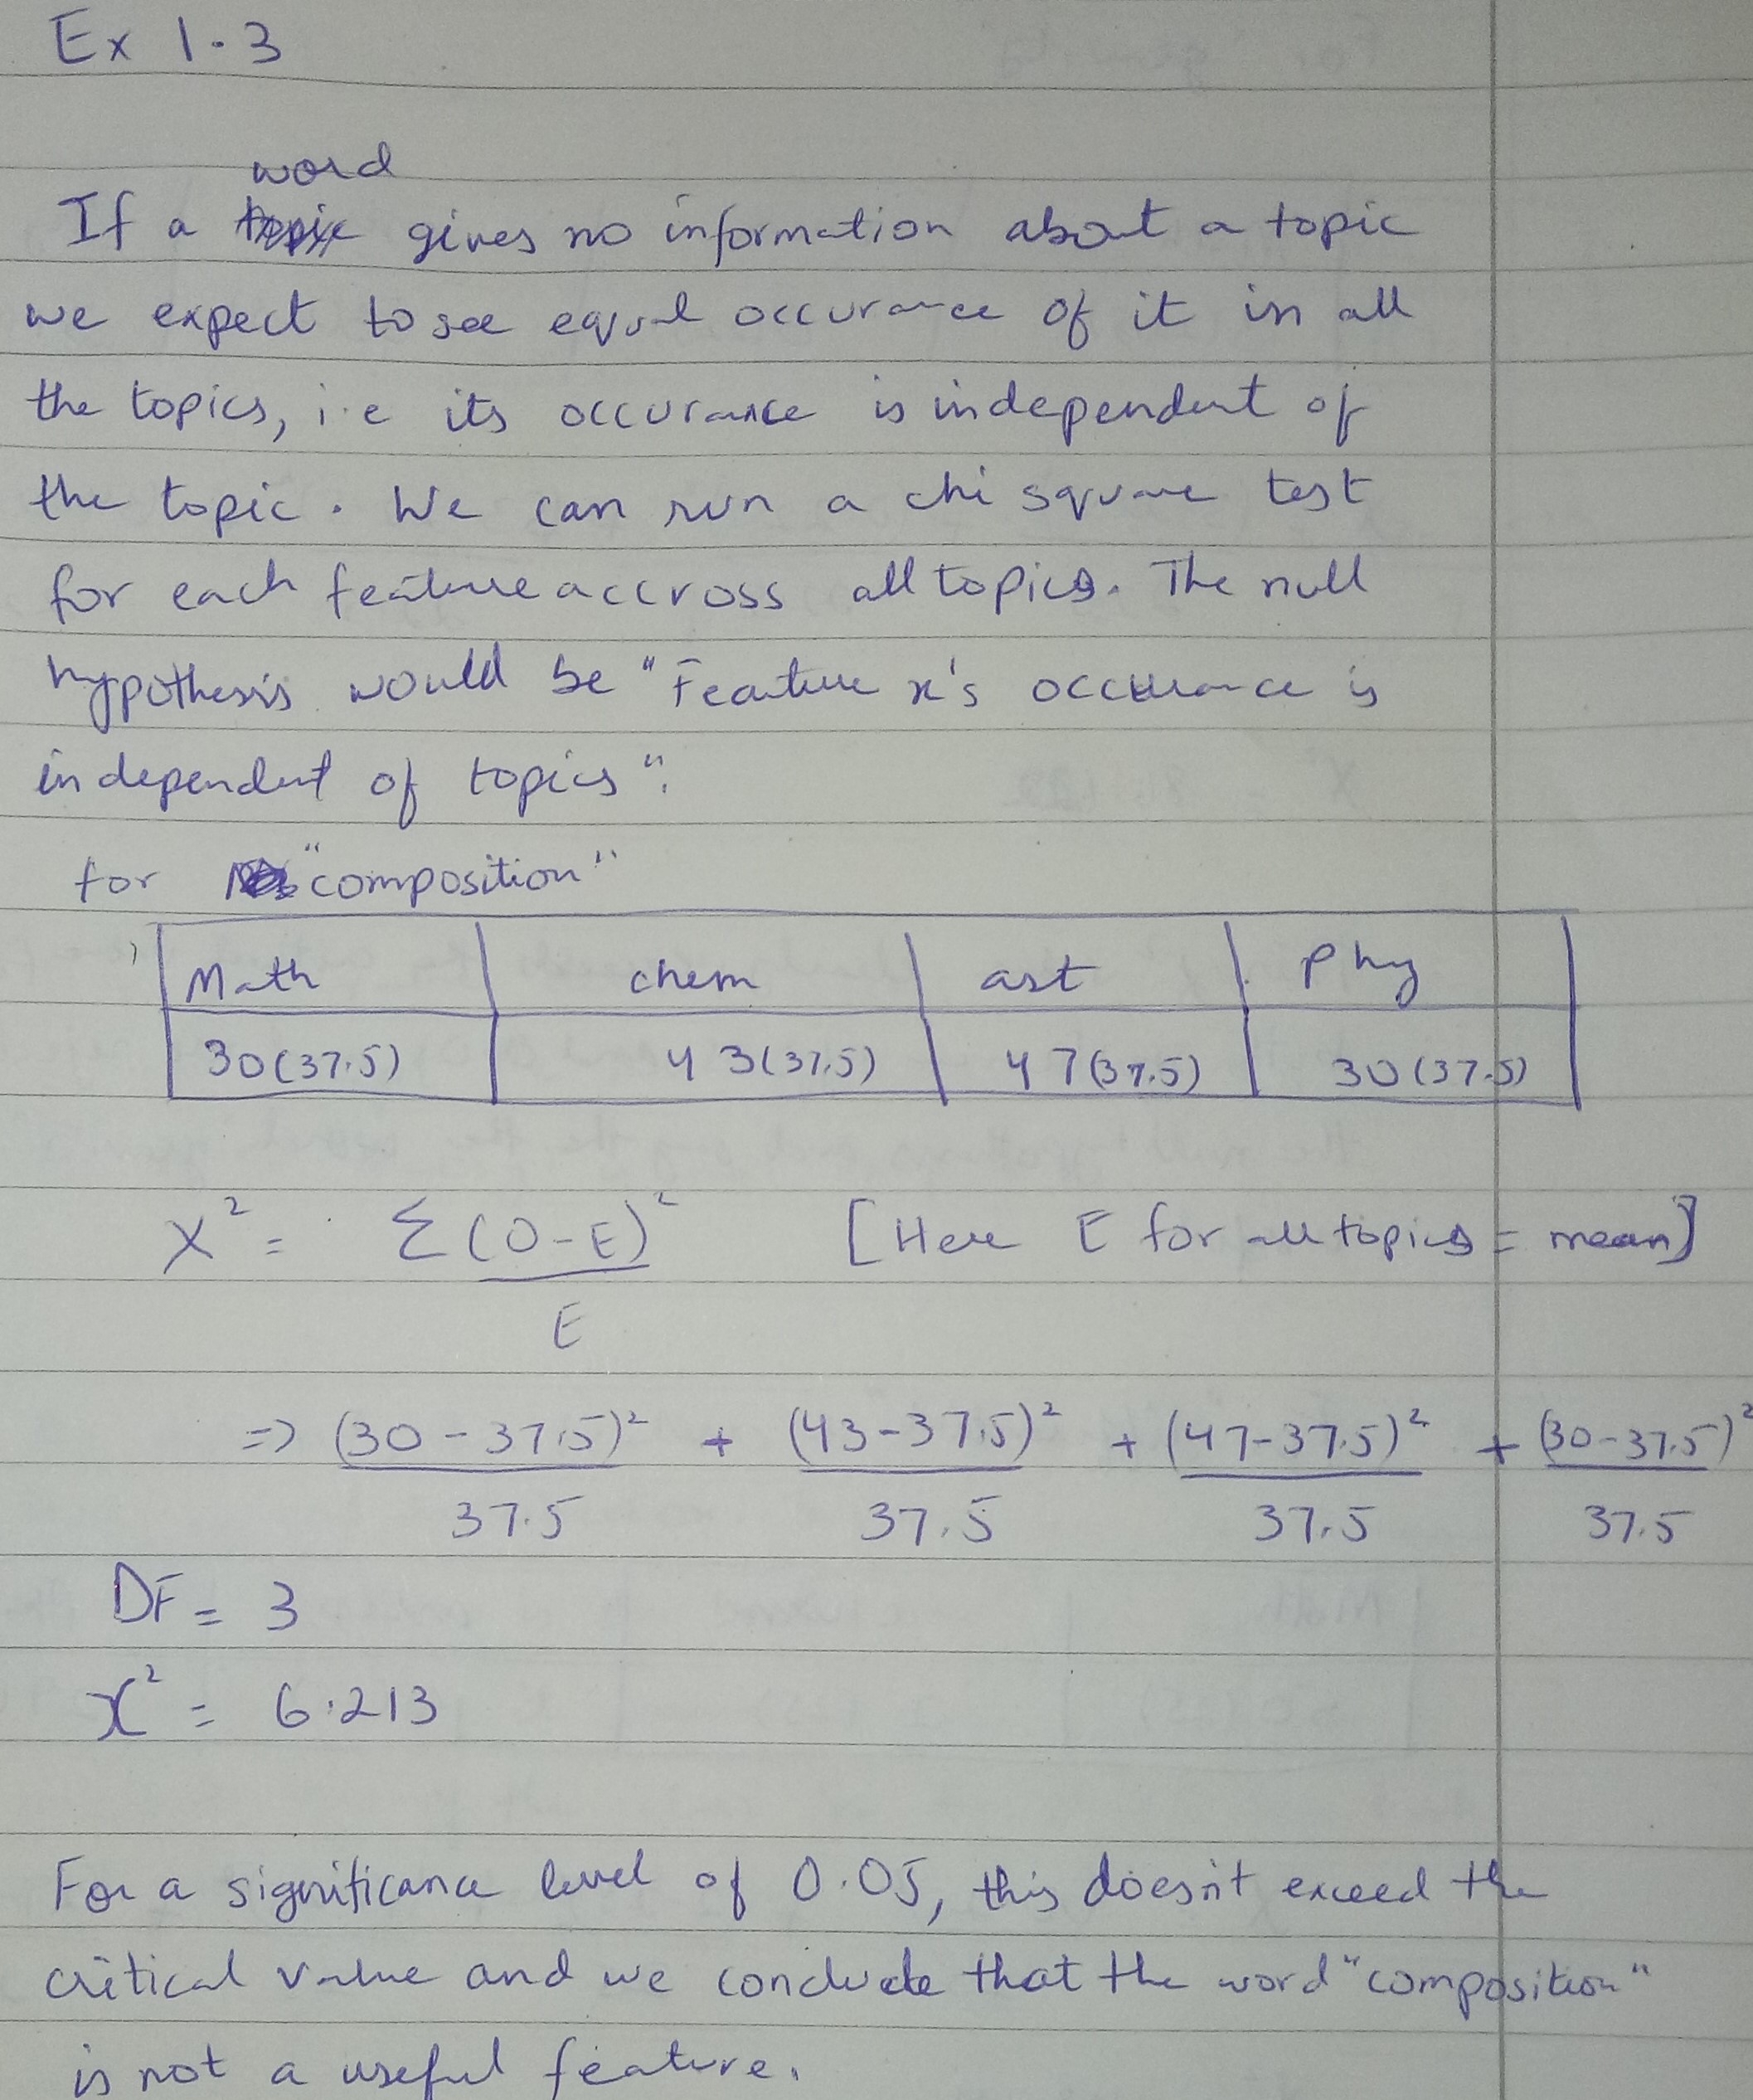</img>

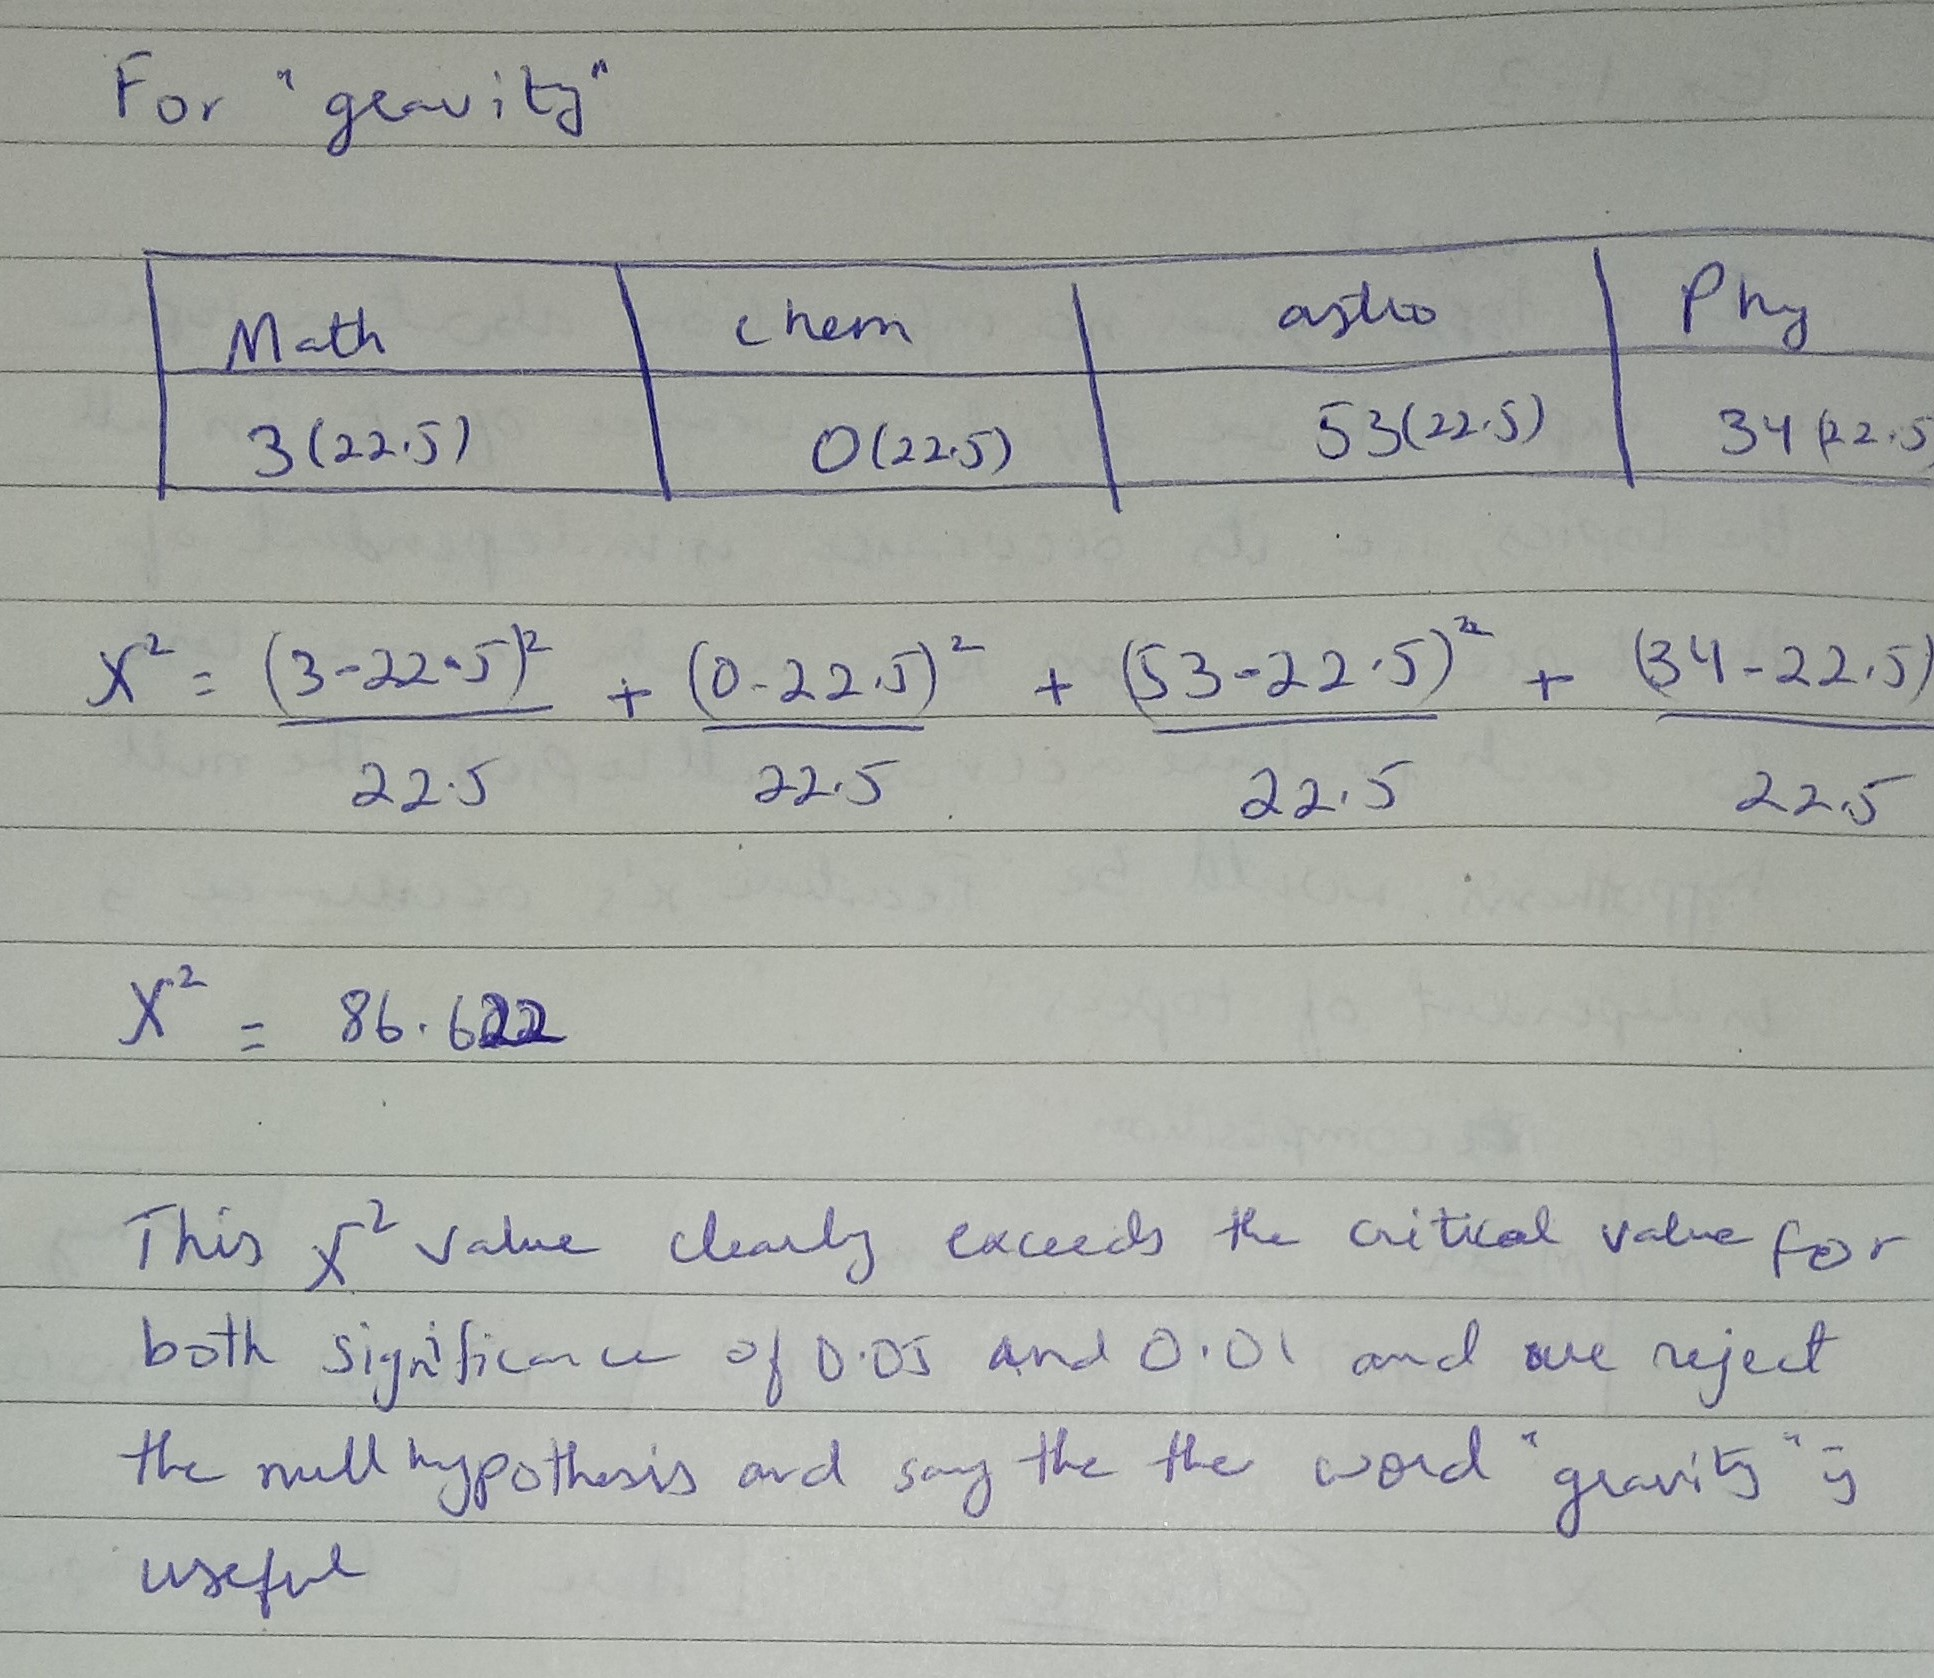</img>

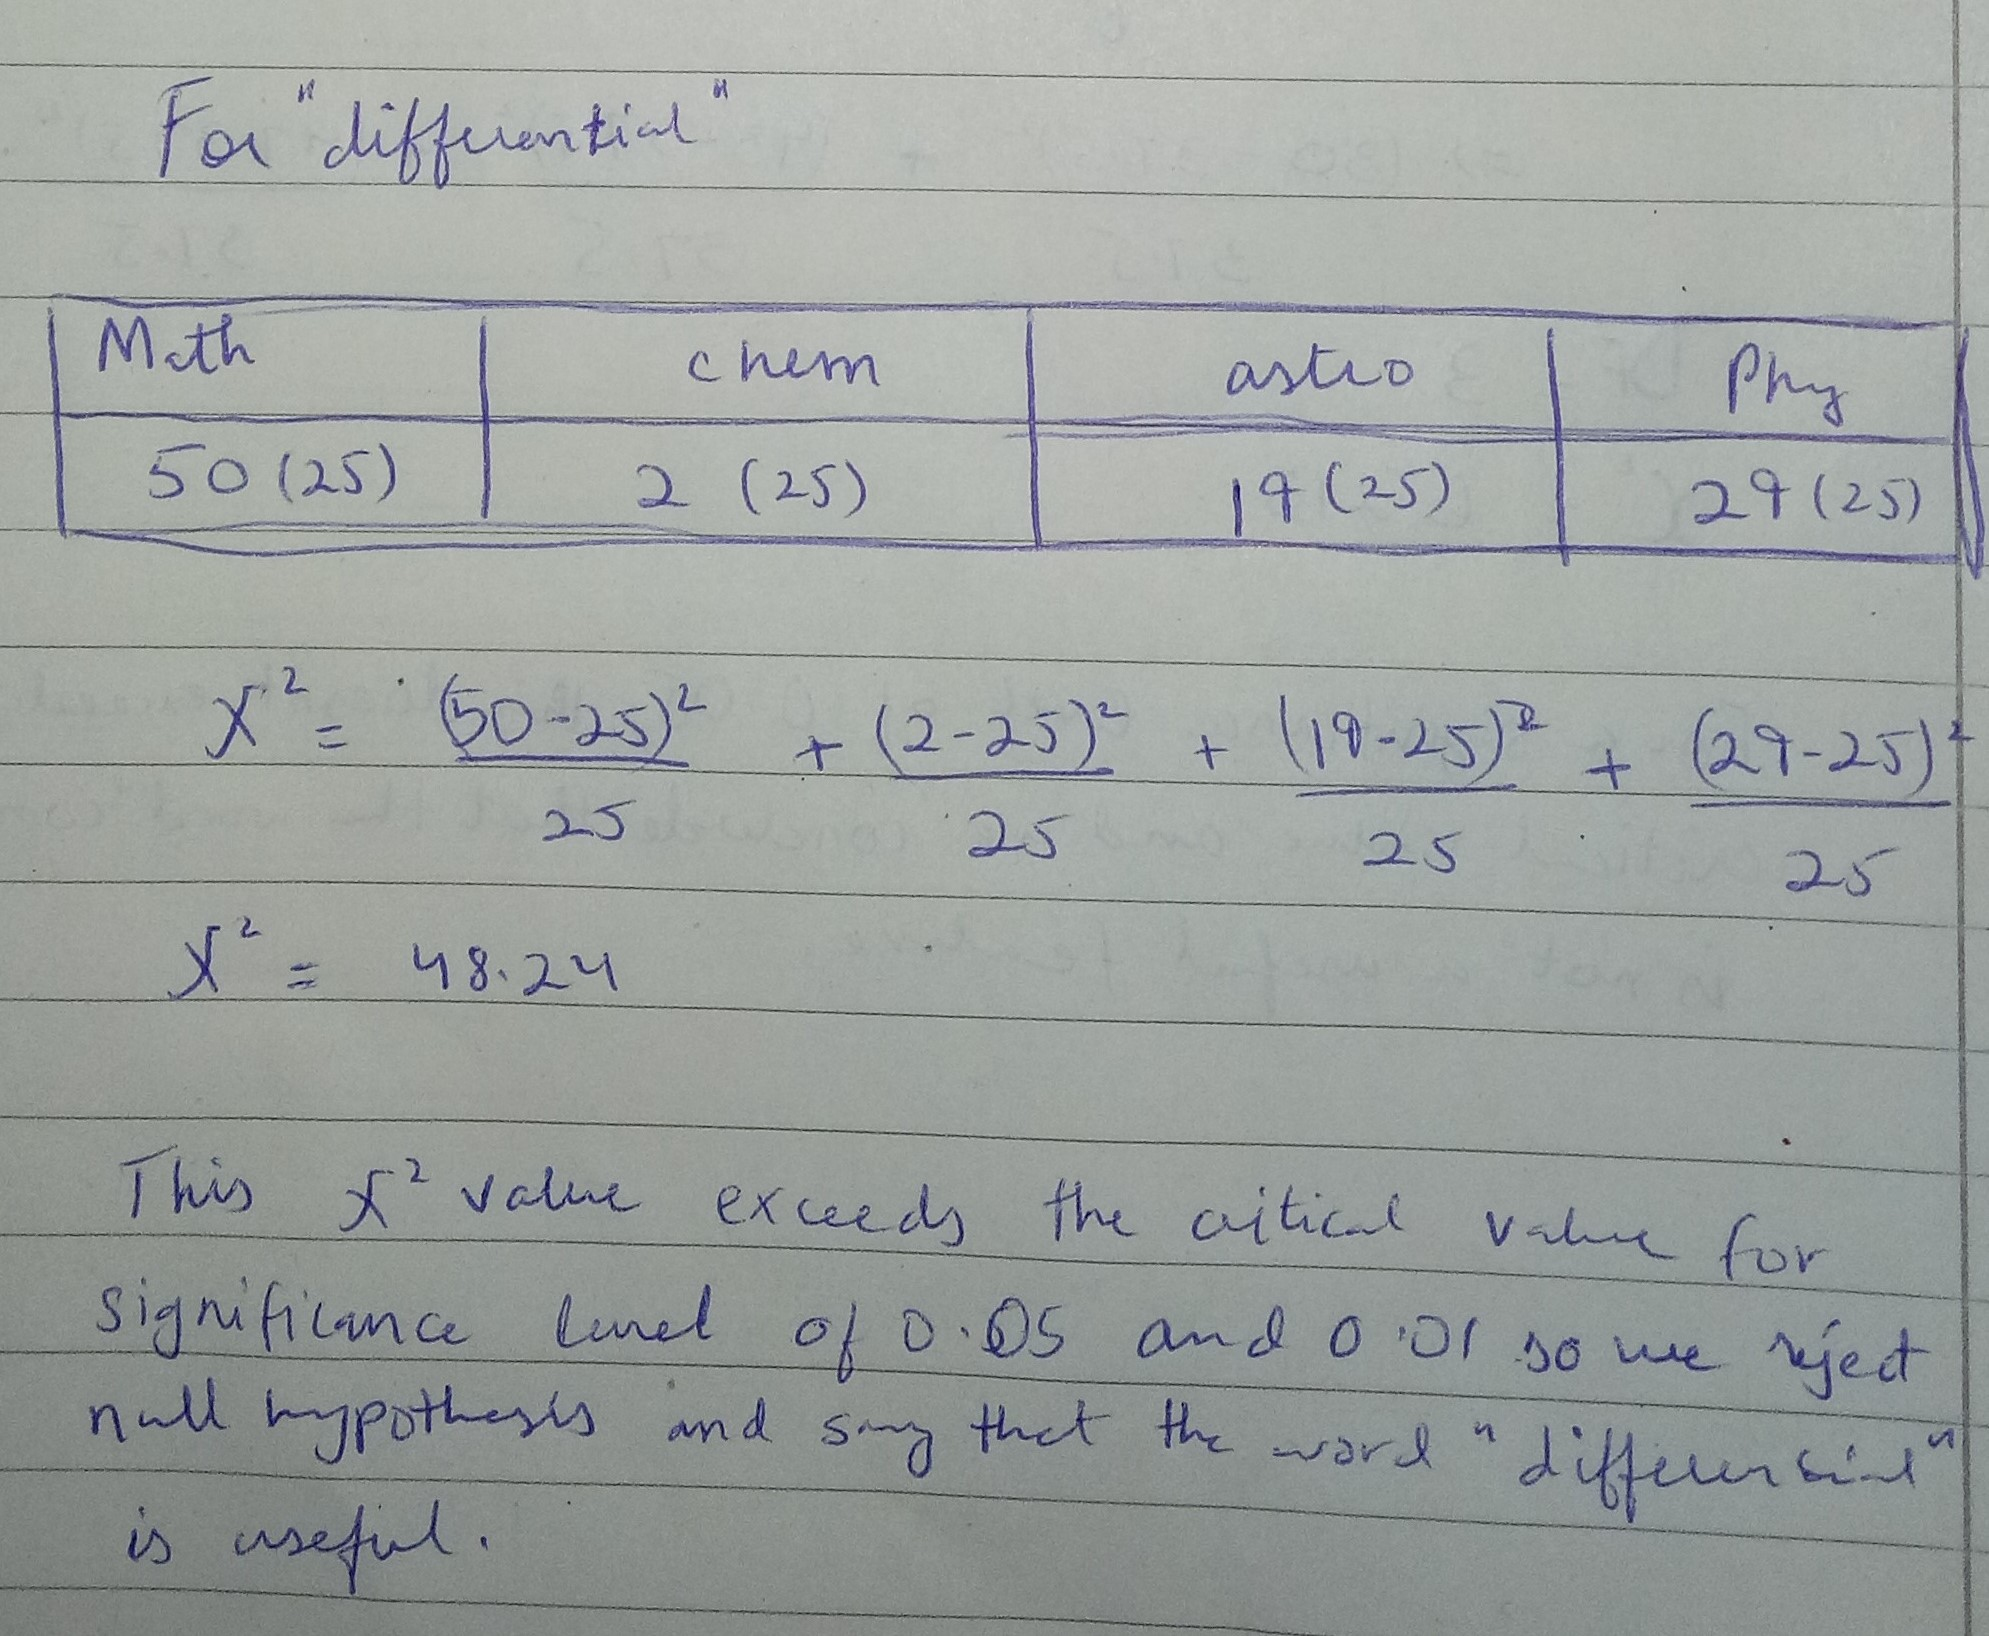</img>

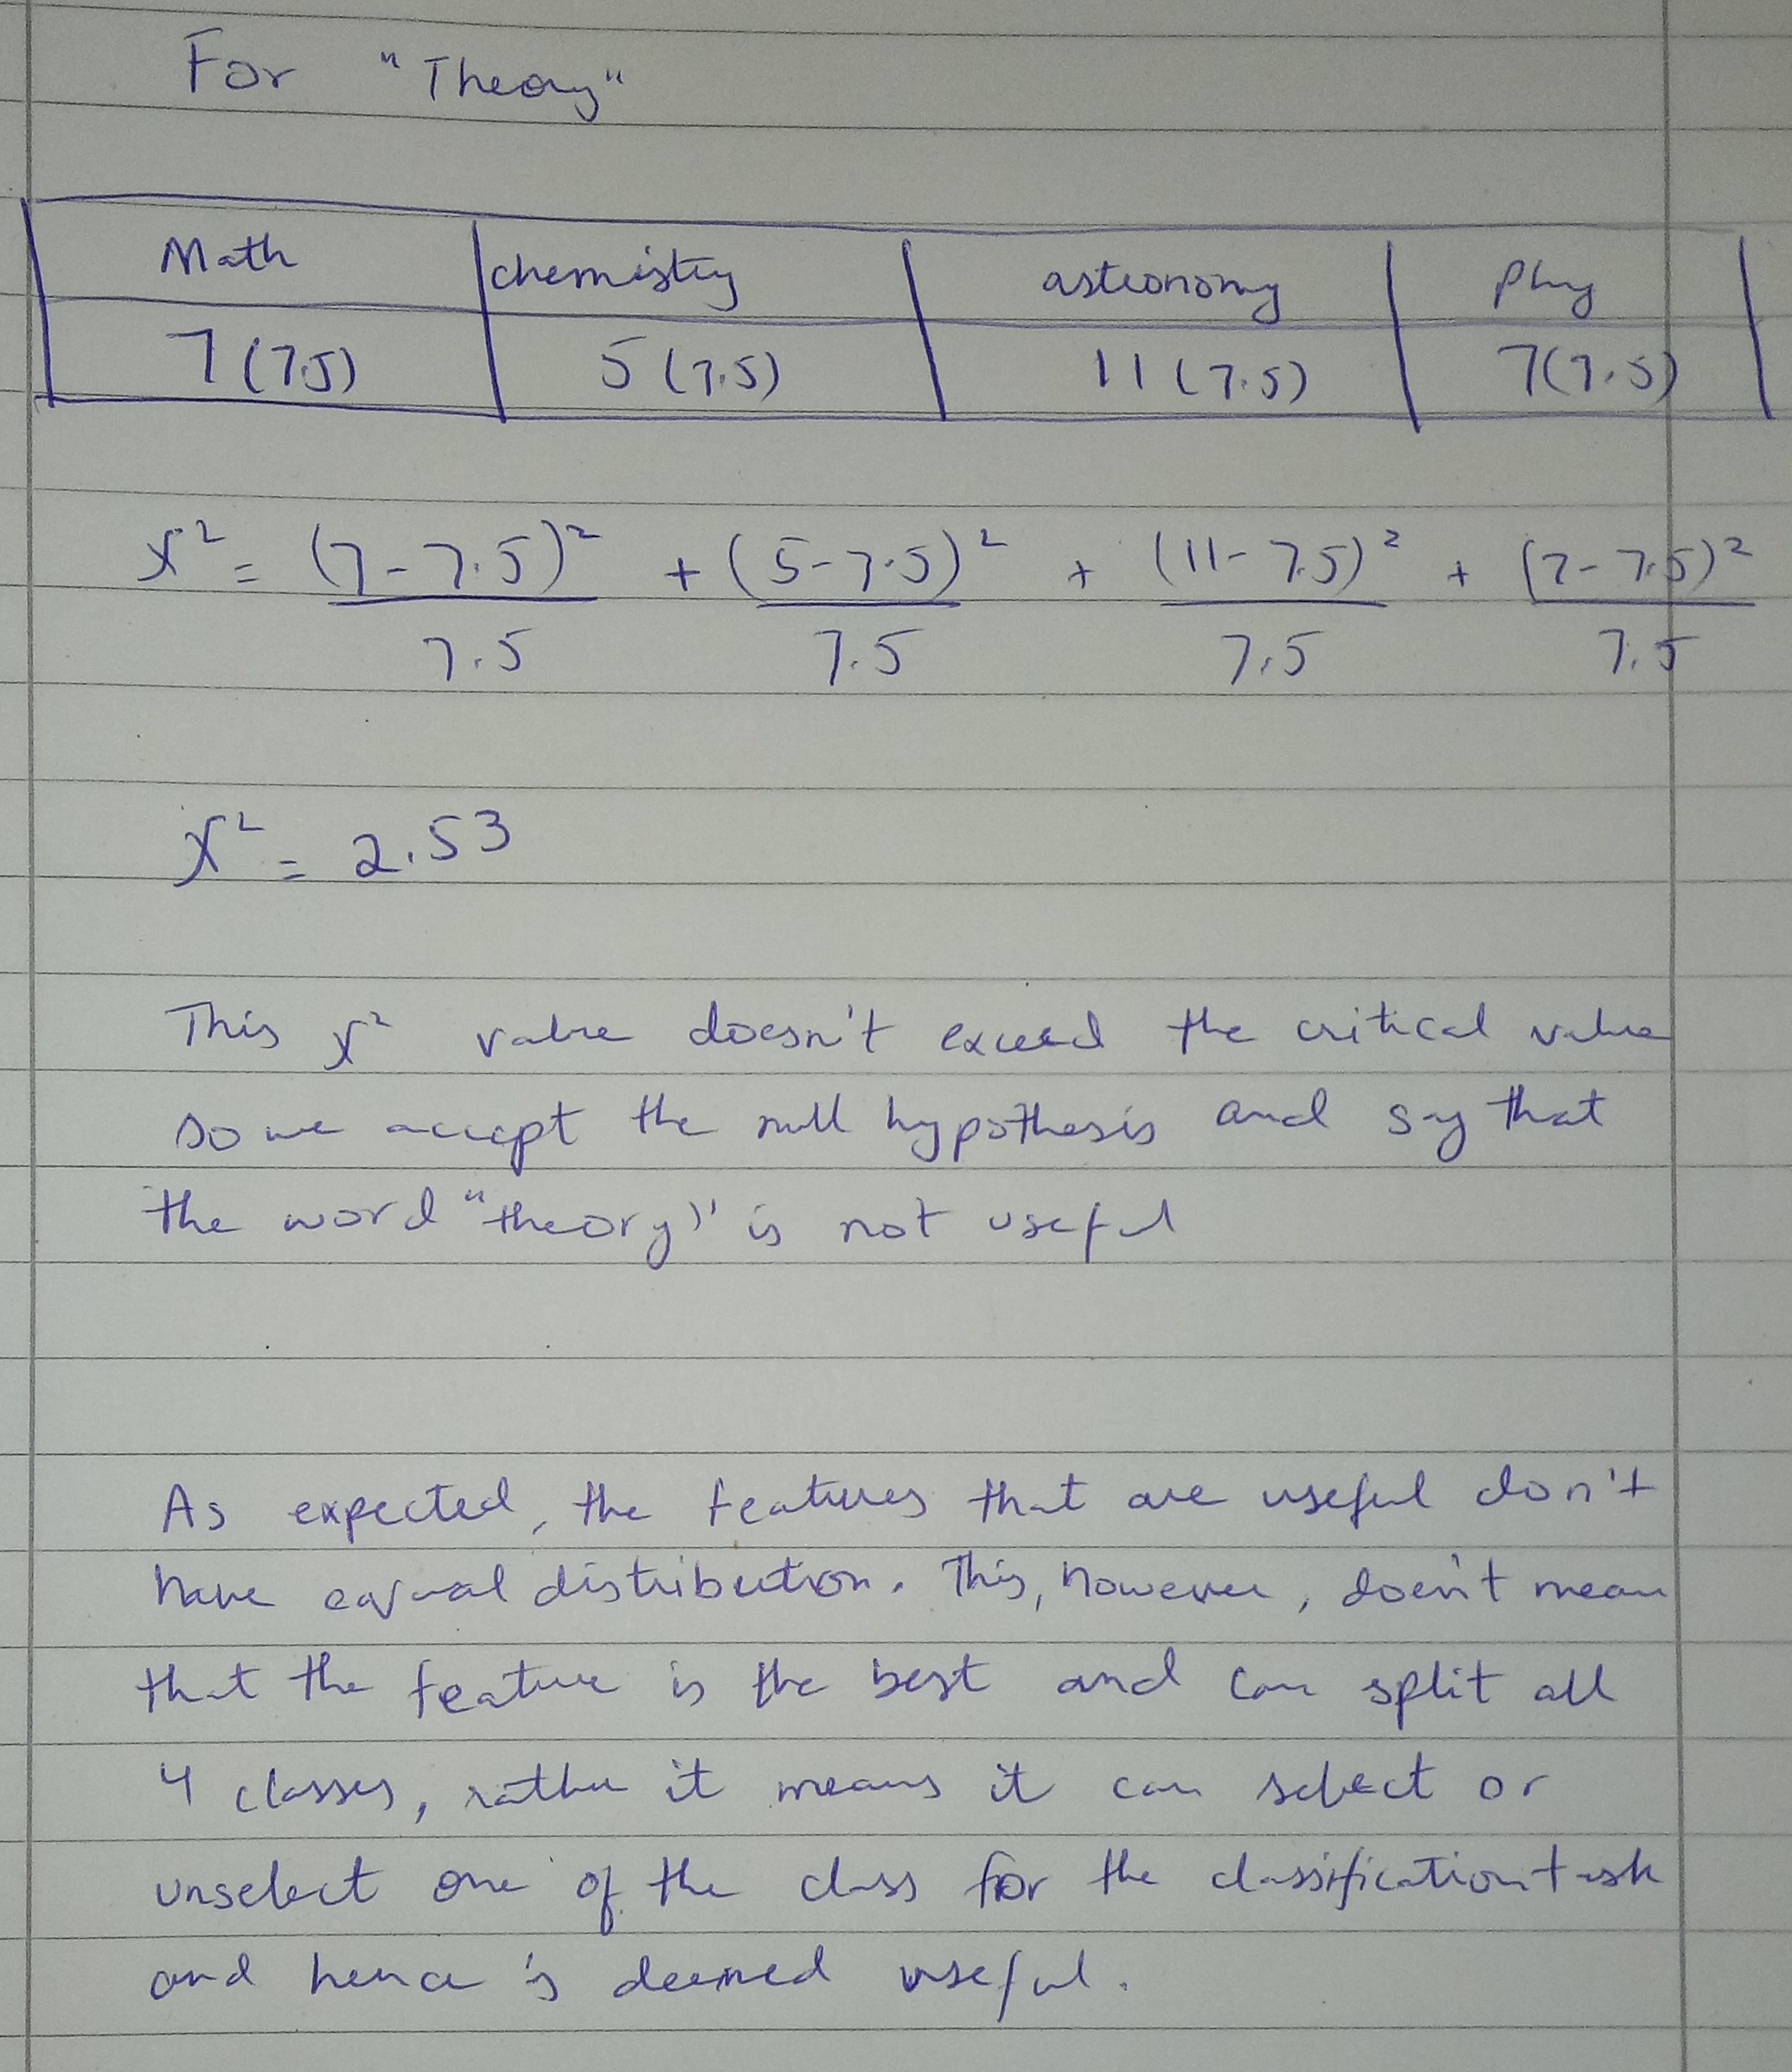</img>